In [13]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Iris.csv')

In [15]:
df = data.copy(deep=True)

In [16]:
df.shape

(150, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='Species', ylabel='count'>

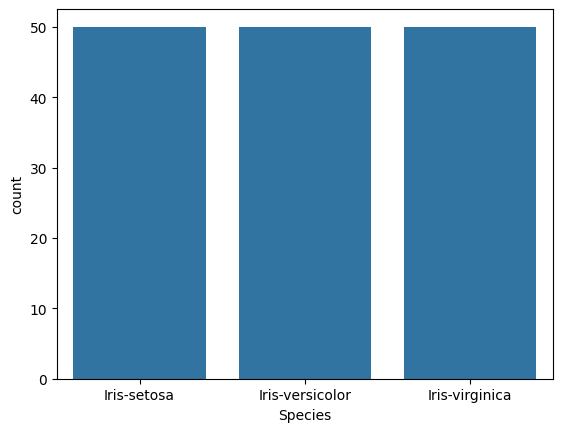

In [18]:
sns.barplot(data=df['Species'].value_counts())

In [19]:
mapping = {
    "Iris-setosa": 'Setosa',
    "Iris-versicolor": 'Versicolor',
    "Iris-virginica": 'Virginica',
}

df["Species"] = df["Species"].map(mapping)

<Axes: >

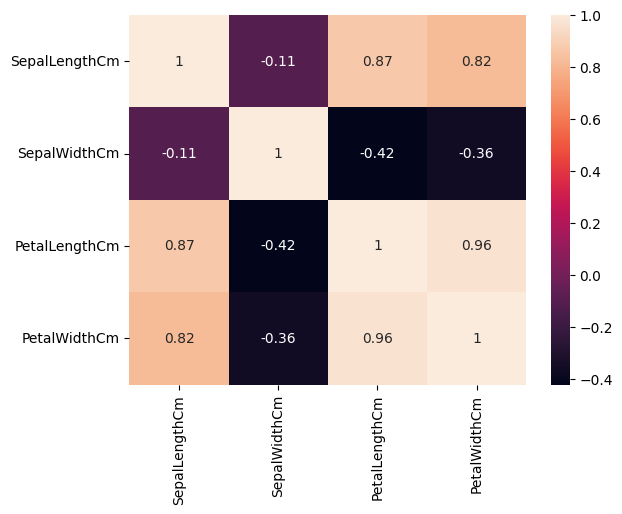

In [20]:
cor = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
sns.heatmap(data=cor,annot=True)

In [21]:
X = df.drop(columns=['Species'])
y = df['Species']

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [23]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

(90, 5) (90,) (30, 5) (30,) (30, 5) (30,)


In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,max_depth=5)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [66]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_train)
print("Accuracy Score =", format(accuracy_score(y_train,predictions)))

Accuracy Score = 1.0


In [67]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_valid)
print("Accuracy Score =", format(accuracy_score(y_valid,predictions)))

Accuracy Score = 1.0


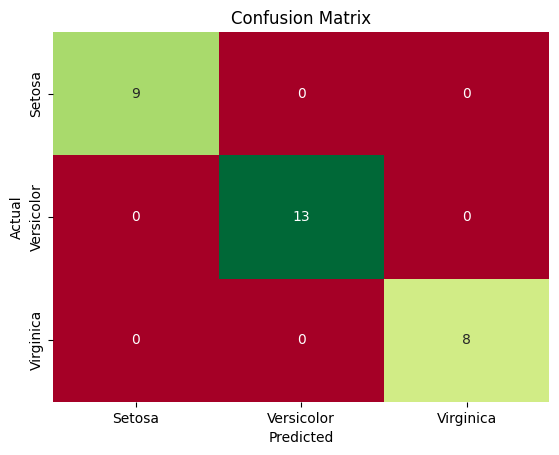

In [68]:
from sklearn.metrics import confusion_matrix

prediction = rfc.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = rfc.predict(X_valid)
print("Precision = ",format(precision_score(y_valid,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_valid,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_valid,prediction,average=None).mean()))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


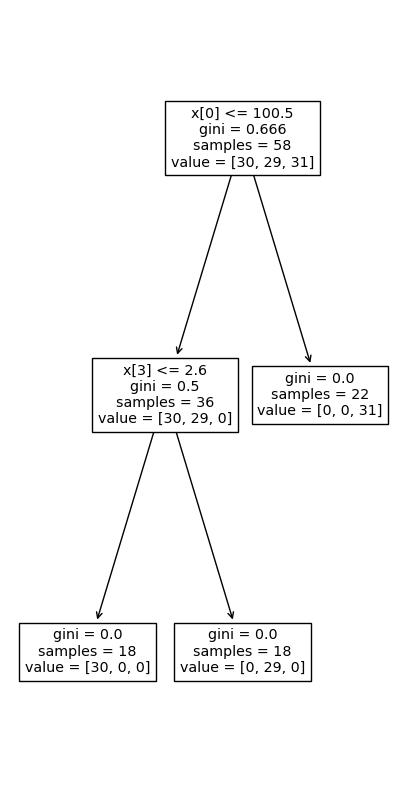

In [70]:
from sklearn import tree

i = 0
plt.figure(figsize=(5,10))
tree.plot_tree(rfc.estimators_[i])
plt.savefig('fig'+str(i))
plt.show()